In [24]:
# %load "lab1.py"
from collections import Counter, defaultdict, namedtuple
from itertools import count
from functools import partial
from math import exp, log
import random
import os
import scipy.stats as stats
import scipy.optimize as opt
import numpy as np
from matplotlib import pyplot as plt

from criterion.x2 import X2Discrete
from criterion.exp_range import ExpRange
from optimize.evolution import EvolutionOptimize

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sbn

In [51]:
sbn.set(color_codes=True)
sbn.axes_style('whitegrid')

{'axes.axisbelow': True,
 'axes.edgecolor': '.8',
 'axes.facecolor': 'white',
 'axes.grid': True,
 'axes.labelcolor': '.15',
 'axes.linewidth': 1,
 'figure.facecolor': 'white',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'grid.color': '.8',
 'grid.linestyle': '-',
 'image.cmap': 'rocket',
 'legend.frameon': False,
 'legend.numpoints': 1,
 'legend.scatterpoints': 1,
 'lines.solid_capstyle': 'round',
 'text.color': '.15',
 'xtick.color': '.15',
 'xtick.direction': 'out',
 'xtick.major.size': 0,
 'xtick.minor.size': 0,
 'ytick.color': '.15',
 'ytick.direction': 'out',
 'ytick.major.size': 0,
 'ytick.minor.size': 0}

In [8]:
def read_file():
    lines = []
    with open(os.path.join(os.path.abspath(os.curdir), 'lab1_range.txt'), mode='r', encoding='utf-8') as f:
        lines = f.readlines()
    x = []
    for line in lines:
        for s in line.split(';'):
            try:
                x.append(float(s.replace(',', '.')))
            except Exception as e:
                print(e)
    # print(Pirson(x, y, r=True, c=1))
    # print(Pirson.find_optimal_interval(x,start_count=100))
    return x

def create_text_y(plot, y, up=1):
    for i in zip(plot.get_xticks(), y):
        plot.text(i[0], i[1]+up, str(i[1]))

In [9]:
x1 = [
            5,3,9,2,12,3,3,3,3,12,2,3,2,3,5,9,5,2,12,12,
            12,12,5,7,2,3,3,5,7,9,9,5,12,9,5,2,3,5,12,3,
            9,9,9,2,12,3,2,12,3,5,12,3,3,9,5,2,9,12,9,9,
            3,12,2,12,5,3,12,12,3,2,2,12,9,7,3,9,5,5,9,3,
            3,9,12,9,5,5,3,9,5,9,9,7,3,2,7,3,3,9,7,5
        ]
y1 = {2:0.1, 3:0.2, 5:0.15, 7:0.05, 9:0.3, 12:0.2}
x2 = read_file()

could not convert string to float: 
could not convert string to float: 
could not convert string to float: 
could not convert string to float: 
could not convert string to float: 
could not convert string to float: 
could not convert string to float: 
could not convert string to float: 
could not convert string to float: 


In [10]:
# Вычесление критерия для дискретной величены
print(X2Discrete(x1,y1).get_stat())

5.516666666666667


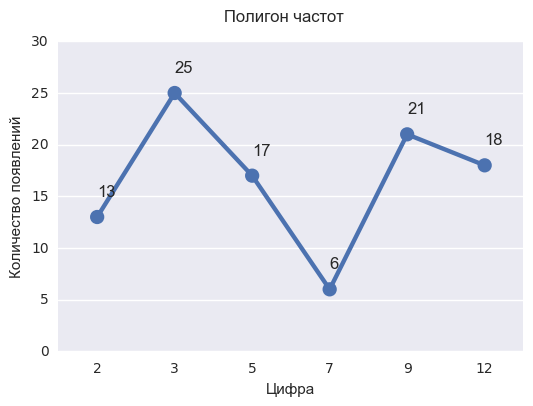

In [53]:
c = Counter(x1)
_x1 = [k for k,_ in c.items()]
_y1 = [v for _,v in c.items()]
plot2 = sbn.pointplot(_x1, _y1)
# sbn. 'Полигон частот'
plot2.figure.suptitle('Полигон частот')
plot2.set(xlabel='Цифра', ylabel='Количество появлений')
create_text_y(plot2,_y1, up=2)

In [11]:
# Вычесления критерия для непрерывной величены
r = [0, 0.2, 0.4, 0.6, 0.8, 1.0, 5.7]
P = ExpRange(x2, {}, 1.5, r)
z = P.get_stat()
print(z)

2.3938972451283336


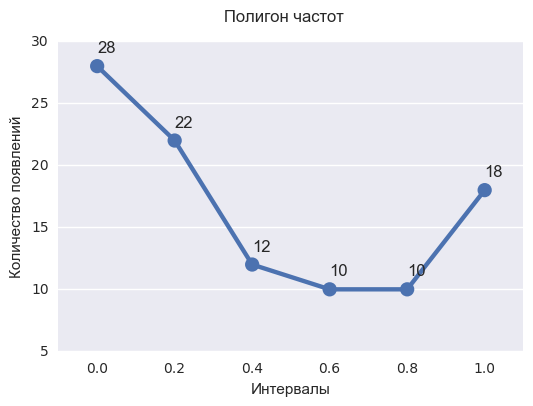

In [52]:
_r = r[:-1]
_y = ExpRange.transform_range_to_array(x2, set_range=r)
_y = [v for k,v in _y.items()]
plot = sbn.pointplot(_r, _y)
plot.figure.suptitle('Полигон частот')
plot.set(xlabel=u'Интервалы', ylabel=u'Количество появлений')
create_text_y(plot, _y, up=1.1)